## Пример нейронной сети: диагностика диабета

### Загрузка и подготовка данных

Загрузим датасет с https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes  
Структура датасета:  
* Число беременностей (все пациенты из источника – женщины не моложе 21 года индийской народности пима).
* Концентрация глюкозы в плазме через 2 часа после введения в пероральном глюкозотолерантном тесте.
* Диастолическое артериальное давление (мм рт. ст.).
* Толщина кожной складки в районе трицепса (мм).
* Концентрация инсулина в сыворотке крови (мкЕд/мл).
* Индекс массы тела (вес в кг/(рост в м)^2).
* Функция, описывающая генетическую предрасположенность к диабету (diabetes pedegree).
* Возраст (годы).

In [1]:
import numpy as np
import pandas as pd

col_names = ['pregnant','glucose','blood pressure','skin thickness','insulin','mass index','diabetesfunct','age','class']
data = pd.read_csv('data/prima-indians-diabetes.csv', sep=',', names=col_names)

features = data.loc[:, data.columns != 'class']
labels = data['class']

data.head()

,pregnant,glucose,blood pressure,skin thickness,insulin,mass index,diabetesfunct,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Разделим множества на обучающую и тестовую выборки в соотношении 8/2

In [2]:
barrier = int(len(labels)*0.8)

Y_train = labels[:barrier]
X_train = features[:barrier]
Y_test = labels[barrier:]
X_test = features[barrier:]

### Создадим нейронную сеть

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss="binary_crossentropy", optimizer="adadelta", metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, epochs=100, batch_size=12, validation_split=0.2, verbose=0)

### Выедем статистику обучения

Populating the interactive namespace from numpy and matplotlib


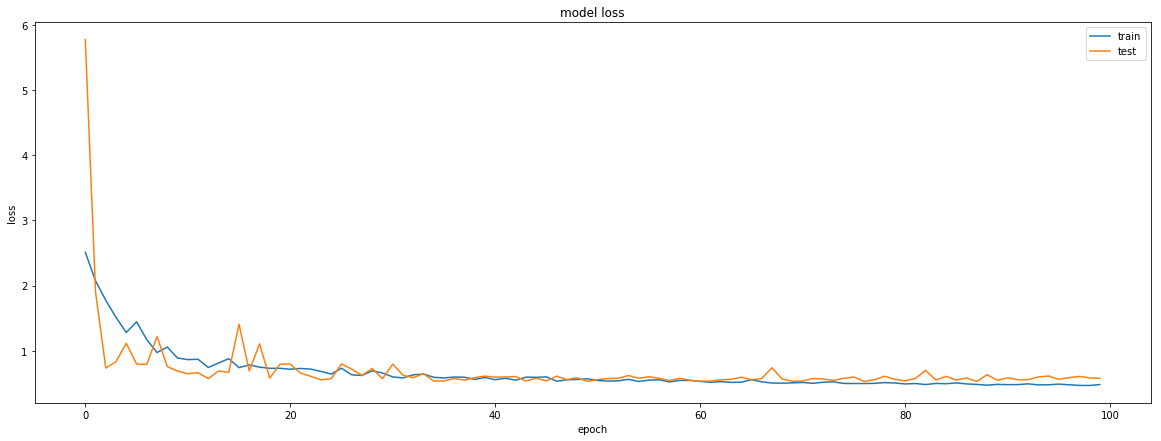

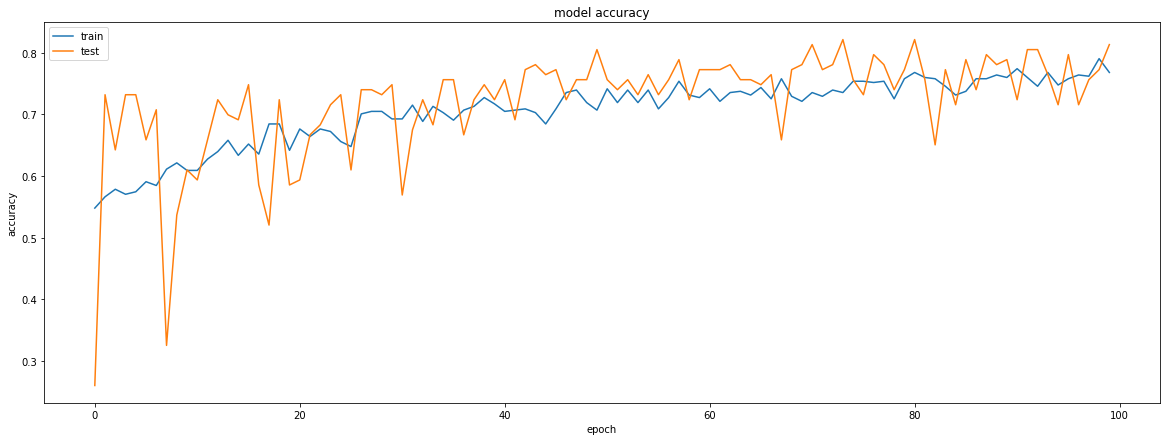

In [58]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure(figsize(20,7))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Оцениваем результат

In [59]:
scores = model.evaluate(X_test, Y_test)
print("Точность на тестовых данных: %.2f%%" % (scores[1]*100))

154/154 [==============================] - 0s 45us/step
Точность на тестовых данных: 70.78%


### Гиперпараметры  

* **При подгтовке данных**  
   * Размер окна
* **Сети (forward)**
   * Количство нейронов
   * Количество скрытых слоев
   * Функции активации
   * ~~Регуляризация~~
* **Сети (background)**
   * Функция потерь
   * Оптимизатор
   * Метрики
* **Обучения**
  * Количество эпох
  * Размер батча